# DECISION TREE IMPLEMENTATION ON IRIS DATASET(CATEGORICAL VALUES)

In [1]:
#IMPORTING ALL THE LIBRARIES REQUIRED
from sklearn import datasets
import pandas as pd
import numpy as np
import math

In [2]:
#IMPORTING IRIS DATASET
iris = datasets.load_iris()

In [3]:
#STORING THE DATASET AS A DATAFRAME IN df
df = pd.DataFrame(iris.data)
#COLUMNS IN DF
df.columns = ["sl", "sw", 'pl', 'pw']

In [4]:
#IN THIS SECTION THE CONTINUOUS VALUES OF THE DATASET ARE CONVERTED TO CATEGORICAL, ALREADY DONE IN THE BASE CODE
#Function to find label for a value
#if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label a
#if (m + Mean_Value) <=val < Mean_Value then it is assigned label b
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label c
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'

#Function to convert a continuous data into labelled data
#There are 4 lables  - a, b, c, d
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

In [5]:
#Convert all columns to labelled data
df['sl_labeled'] = toLabel(df, 'sl')
df['sw_labeled'] = toLabel(df, 'sw')
df['pl_labeled'] = toLabel(df, 'pl')
df['pw_labeled'] = toLabel(df, 'pw')
df

,sl,sw,pl,pw,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,5.1,3.5,1.4,0.2,b,c,a,a
1,4.9,3.0,1.4,0.2,a,b,a,a
2,4.7,3.2,1.3,0.2,a,c,a,a
3,4.6,3.1,1.5,0.2,a,c,a,a
4,5.0,3.6,1.4,0.2,a,c,a,a
5,5.4,3.9,1.7,0.4,b,d,a,a
6,4.6,3.4,1.4,0.3,a,c,a,a
7,5.0,3.4,1.5,0.2,a,c,a,a
8,4.4,2.9,1.4,0.2,a,b,a,a
9,4.9,3.1,1.5,0.1,a,c,a,a


In [6]:
#THE CONTINUOUS VALUED COLUMNS ARE DELETED AND NOW WE HAVE A PURE CATEGORICAL VALUED DATASET
df.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)

In [7]:
#CHECKING WHAT VALUES ARE THERE IN A PARTICULAR BY CONVERTING IT INTO A SET
set(df['sl_labeled'])

{'a', 'b', 'c', 'd'}

In [8]:
#THE DATAFRAME
df

,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,b,c,a,a
1,a,b,a,a
2,a,c,a,a
3,a,c,a,a
4,a,c,a,a
5,b,d,a,a
6,a,c,a,a
7,a,c,a,a
8,a,b,a,a
9,a,c,a,a


In [9]:
#dfnp=np.array(df)
#dfnp.shape

In [10]:
#THE 'Y' COLUMN VALUES i.e. TARGET COLUMN IS ADDED TO THE DATAFRAME
df['op']=iris.target
df

,sl_labeled,sw_labeled,pl_labeled,pw_labeled,op
0,b,c,a,a,0
1,a,b,a,a,0
2,a,c,a,a,0
3,a,c,a,a,0
4,a,c,a,a,0
5,b,d,a,a,0
6,a,c,a,a,0
7,a,c,a,a,0
8,a,b,a,a,0
9,a,c,a,a,0


In [11]:
#CONVERTING OUR DATAFRAME TO A 2D NUMPY ARRAY AND STORED IN dfnp
dfnp=np.array(df)
dfnp.shape

(150, 5)

In [19]:
#THIS IS THE MAIN FUNCTION WHICH IS USED TO BUILD THE TREE: THE ARGUMENTS THAT ARE PASSED ARE 
#- THE DATASET, UNUSED FEATURES LIST AND LEVEL OF THE NODE
def decision_tree_build(dfnp,unused_features,level):
    #THE TARGET VALUE COLUMN IS STORED IN res
    res=dfnp[:,4]
    #A NUMPY ARRAY TO STORE COUNTS OF CLASSES 0,1,2 IN THIS ARRAY CALLED classes
    classes=np.zeros(3)
    #POSSIBLE COLUMN VALUES STORED IN classes_op
    classes_op=[0,1,2]
    #THE TARGET COLUMN IS RESHAPED FROM ('NO. OF ROWS',) TO ('NO. OF ROWS',1) AND STORED IN res_col
    res_col=res.reshape(-1,1)
    #THE INITIAL ENTROPY IS SET TO 0
    baseentropy=0
    #LOOP FOR CALCULATING THE BASE ENTROPY
    for i in classes_op:
        #THE NO. OF ELEMENTS OF EACH CLASS IS CALCULATED AND STORED IN length
        length=res_col[res_col[:,0]==i].shape[0]
        #AT EACH POSITION , NO. OF ELEMENTS OF THAT PARTICULAR CLASS IS STORED
        classes[i]=length
        #WE NEED THIS CONDITION AS WE'RE CALCULATING LOG AND LOG(0) IS UNDEFINED
        if(length>0):
            #BASE ENTROPY IS CALCULATED BY LOOPING THROUGH ALL ELEMENTS
            baseentropy+=(-(length/res_col.shape[0])*math.log(length/res_col.shape[0]))
    #NOW WE HAVE THE BASE ENTROPY BY THIS STEP
    #THIS IS THE BASE CASE WHICH IS, EITHER NO FEATURES LEFT TO SPLIT UPON OR ELEMENTS OF ONLY A SINGLE CLASS ARE THERE
    if(len(unused_features)==0 or len(set(res))==1):
        #PRINTING THE VALUES IN A PARTICULAR FORMAT
        print("Level: ",level)
        print("_____________")
        print("Class 0 count: ",classes[0])
        print("Class 1 count: ",classes[1])
        print("Class 2 count: ",classes[2])
        print("Leaf Node")
        print("(No features left/Only elements of single class are left)")
        print("Current Entropy: ",baseentropy)
        print()
        return
    #SETTING BASE FEATURE AND MAX GAIN VALUES AS -1
    best_feature=-1
    max_gain=-1
    #LOOPING THROUGH THE UNUSED FEATURES GIVEN TO US AS A FUNCTION ARGUMENT 
    for f in unused_features:
        #SETTING THE BASE ENTROPY OF FEATURE SPLIT AS 0
        total_feat_split_entropy=0
        #WHAT POSSIBLE VALUES ARE THERE IN A PARTICULAR COLUMN IN unused_features ARE CALCULATED USING SET
        poss_vals=set(dfnp[:,f])
        #LOOPING THROUGH ALL POSSIBLE VALUES IN A PARTICULAR FEATURES
        for p in poss_vals:
            #FINDING WHAT POSSIBLE TARGET VALUES ARE THERE, IN A PARTICULAR FEATURE f WITH PARTICULAR VALUE p AND RESHAPING IT
            splits=dfnp[dfnp[:,f]==p][:,4].reshape(-1,1)
            #LOOPING TO FIND THE LENGTH OF EACH CLASS IN A PARTICULAR FEATURE
            for i in range(3):
                #LENGTH OF EACH CLASS STORED IN length FOR A PARTICULAR FEATURE AND PARTICULAR VALUE
                length=splits[splits[:,0]==i].shape[0]
                #WE NEED THIS CONDITION AS WE'RE CALCULATING LOG AND LOG(0) IS UNDEFINED
                if(length>0):
                    #ENTROPY OF A FEATURE IS CALCULATED AND WEIGHTED AVERAGE IS DONE AND STORED NY APPLYING THE FORMULA
                    total_feat_split_entropy+=(splits.shape[0]/dfnp.shape[0])*(-(length/splits.shape[0])*math.log(length/splits.shape[0]))
        #COMPARING THE DIFFERENCE OF THE BASE ENTROPY AND ENTROPY OF A PARTICULAR FEATURE AND COMPARING IT WITH MAX GAIN
        if(baseentropy-total_feat_split_entropy>max_gain):
            #IF THE CONDITION IS SATISFIED THEN THE BEST FEATURE IS REPLACED WITH THE CURRENT FEATURE
            bestfeature=f
            #IF THE CONDITION IS SATISFIED THEN THE MAX GAIN IS REPLACED WITH THE DIFFERENCE OF THE ENTROPIES AS CALCULATED ABOVE
            max_gain=baseentropy-total_feat_split_entropy
    #THE BEST FEATURE IS REMOVED FROM THE UNUSED FEATURES LIST
    unused_features.remove(bestfeature)
    #THE VALUES ARE PRINTED IN A PARTICULAR FORMAT
    print("Level: ",level)
    print("_____________")
    print("Class 0 count: ",classes[0])
    print("Class 1 count: ",classes[1])
    print("Class 2 count: ",classes[2])
    print("Current Entropy: ",baseentropy)
    print("Best Feature to split: ",bestfeature," Info gain: ",max_gain)
    print()
    #CHECKING WHAT POSSIBLE VALUES ARE THERE IN THE SELECTED BEST FEATURE AND STORED
    best_feature_split=set(dfnp[:,bestfeature])
    #LOOPING THROUGH POSSIBLE VALUES IN THE SELECTED BEST FEATURE
    for i in best_feature_split:
        #CALCULATING THE DATASET FOR EACH VALUE IN THE SELECTED BEST FEATURE
        datanew=dfnp[dfnp[:,bestfeature]==i]
        #RECURSIVELY CALLING WITH THE NEW DATASET, UPDATED UNUSED FEATURES LIST AND NEXT LEVEL
        decision_tree_build(datanew,unused_features,level+1)

In [20]:
#THE FEATURES THAT ARE POSSIBLE 
unused_features=[0,1,2,3]
#CALLING THE BUILD TREE FUNCTION WITH THE INITIAL DATASET, UNUSED FEATURES AND LEVEL 0
decision_tree_build(dfnp,unused_features,0)

Level:  0
_____________
Class 0 count:  50.0
Class 1 count:  50.0
Class 2 count:  50.0
Current Entropy:  1.0986122886681096
Best Feature to split:  3  Info gain:  0.8752583089296135

Level:  1
_____________
Class 0 count:  0.0
Class 1 count:  40.0
Class 2 count:  16.0
Current Entropy:  0.5982695885852573
Best Feature to split:  2  Info gain:  0.21536778951600982

Level:  2
_____________
Class 0 count:  0.0
Class 1 count:  39.0
Class 2 count:  8.0
Current Entropy:  0.45622342016761397
Best Feature to split:  0  Info gain:  0.10945355973980492

Level:  3
_____________
Class 0 count:  0.0
Class 1 count:  23.0
Class 2 count:  7.0
Current Entropy:  0.5432727813369008
Best Feature to split:  1  Info gain:  0.061051894017797426

Level:  4
_____________
Class 0 count:  0.0
Class 1 count:  6.0
Class 2 count:  0.0
Leaf Node
(No features left/Only elements of single class are left)
Current Entropy:  0.0

Level:  4
_____________
Class 0 count:  0.0
Class 1 count:  3.0
Class 2 count:  1.0
Leaf Node

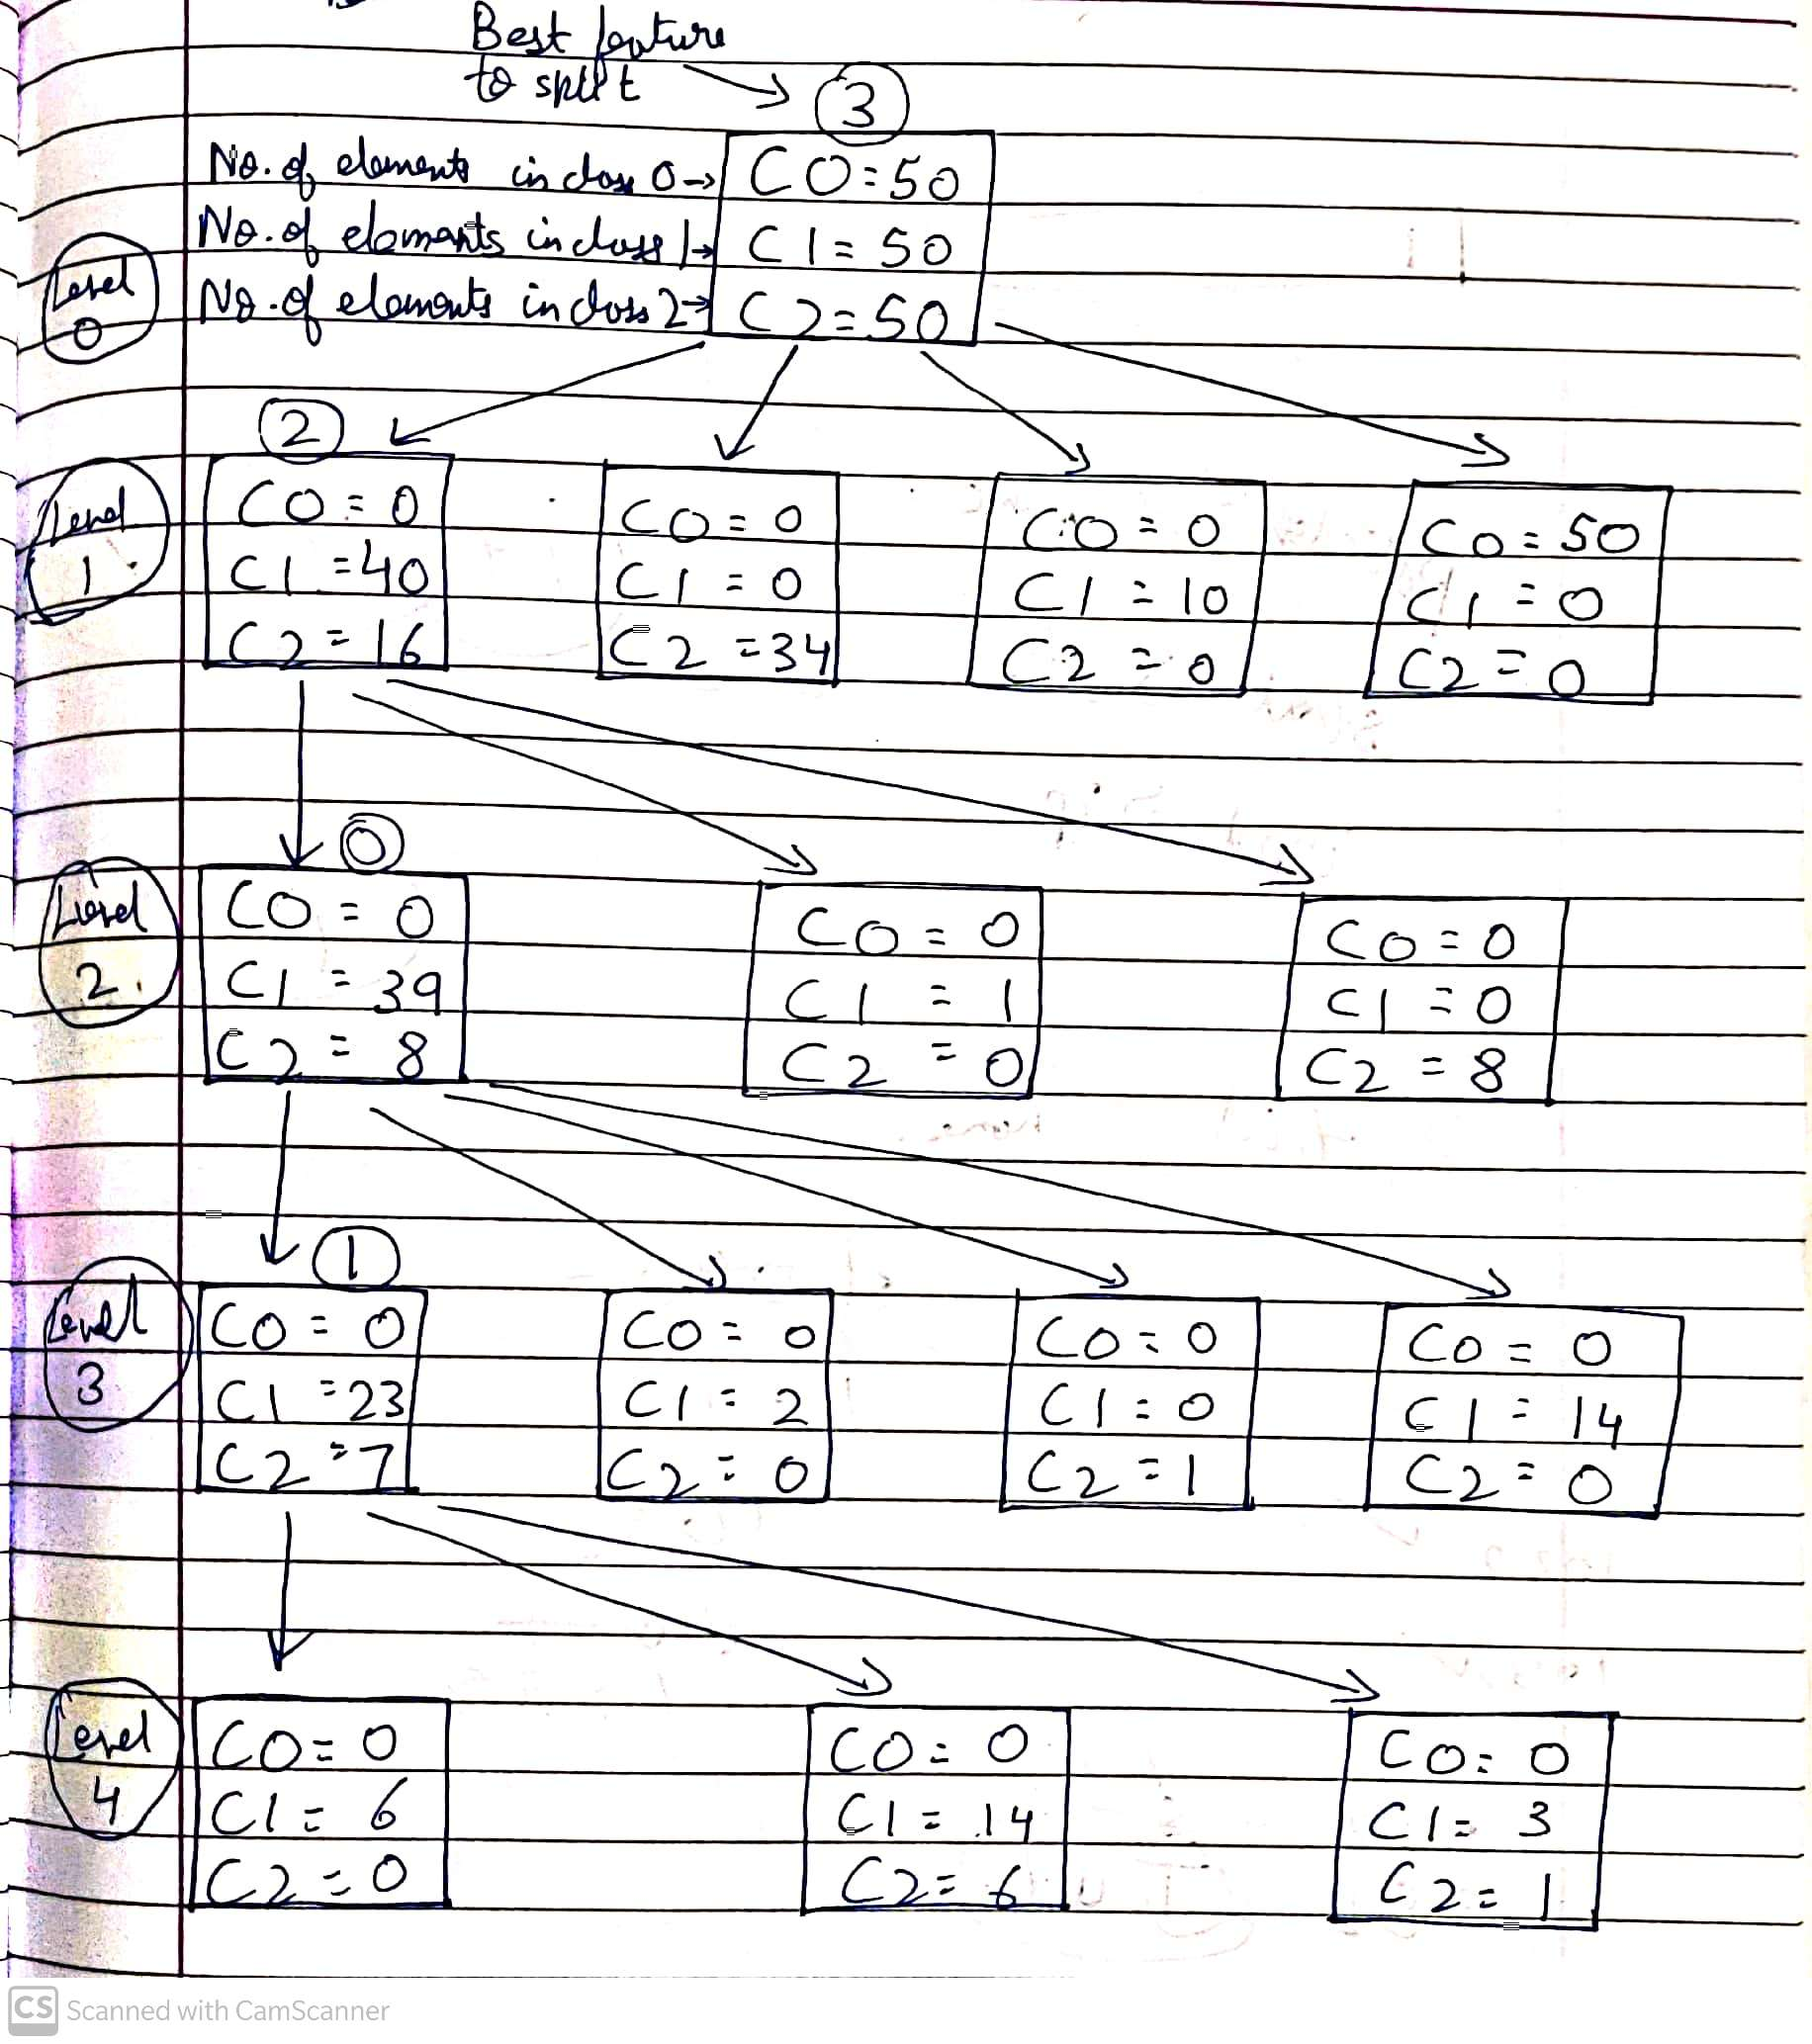

In [29]:
from IPython.display import Image
Image(filename="Decision Tree.jpg",height=100,width=750)